In [1]:
import findspark
findspark.init()    

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

from pyspark.sql.functions import *

In [27]:
# to display notebook cell with horizontal scroll bar
from IPython.display import display, HTML   
display(HTML("<style>.container { width:100% !important; }</style>"))   

In [2]:
df = spark.createDataFrame([
    ("ali",20),
    ("mariem",30),
    ("ayman",40),
    ("ali",50),
    ("mariem",60),
    ("ayman",70),
    ("ali",80)
])

df

DataFrame[_1: string, _2: bigint]

In [3]:
df.printSchema()

root
 |-- _1: string (nullable = true)
 |-- _2: long (nullable = true)



In [4]:
df.show()

+------+---+
|    _1| _2|
+------+---+
|   ali| 20|
|mariem| 30|
| ayman| 40|
|   ali| 50|
|mariem| 60|
| ayman| 70|
|   ali| 80|
+------+---+



In [6]:
# So throw the df with it's schema we can do what we need in an easy way
avg = df.groupBy("_1").avg("_2").show()   

+------+-------+
|    _1|avg(_2)|
+------+-------+
|   ali|   50.0|
|mariem|   45.0|
| ayman|   55.0|
+------+-------+



In [11]:
df.head(2)

[Row(_1='ali', _2=20), Row(_1='mariem', _2=30)]

In [13]:
avg_age  = df.groupBy("_1").agg(avg("_2").alias("average_age"))

avg_age.show()

+------+-----------+
|    _1|average_age|
+------+-----------+
|   ali|       50.0|
|mariem|       45.0|
| ayman|       55.0|
+------+-----------+



<B>-------------------------------------------------------------------------------------------</B>

In [28]:
df = spark.read.json('..\\Data\\people.json')  
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



In [29]:
df.show()

+----+-------+
| age|   name|
+----+-------+
|NULL|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [32]:
df.age,df['age']

(Column<'age'>, Column<'age'>)

In [33]:
col('AAA')

Column<'AAA'>

In [36]:
print(df.select('name'))
print("__________________")
df.select('name').show()    

DataFrame[name: string]
__________________
+-------+
|   name|
+-------+
|Michael|
|   Andy|
| Justin|
+-------+



In [38]:
df.select('age').where(col('age') > 20).show()   

+---+
|age|
+---+
| 30|
+---+



In [39]:
df.select('age').where('age > 20').show()

+---+
|age|
+---+
| 30|
+---+



In [ ]:
import pyspark.sql.functions as fn           # recommended - better than the way above

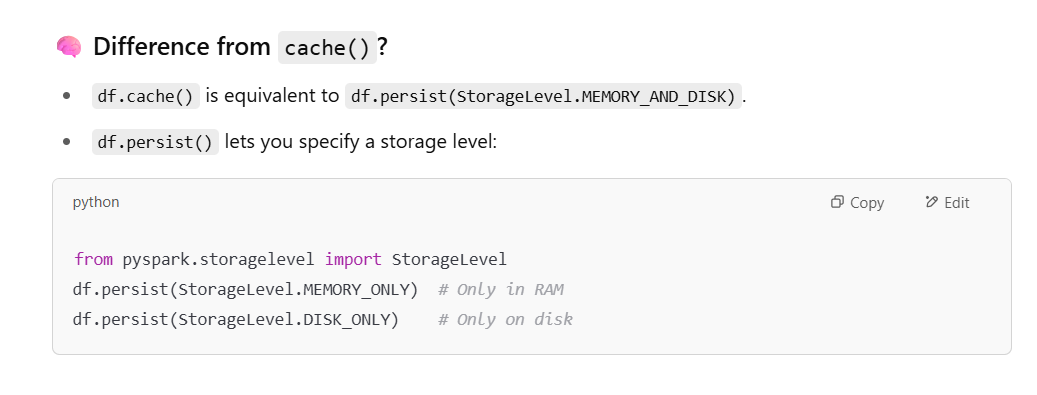

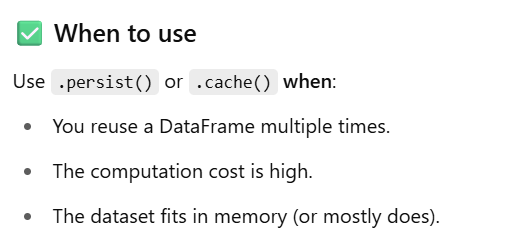

and we have unpersist too

----------------------------------------------------------------------------------------------

In [2]:
from pyspark.sql.types import *

In [4]:
MySchema = StructType([
    StructField("author",StringType(),False),        # False means not nullable (it should not be null)
    StructField("title",StringType(),False),
    StructField("pages",IntegerType(),True)
])

In [10]:
# spark.read.csv(schema=MySchema)
# spark.createDataFrame(schema=MySchema) 

# or we can do it this way
MyNewSchema = 'ID INT not null, First STRING, Last STRING, Url STRING, Published STRING, Hits INT, ARRAY<STRING>'

In [15]:
MyNewSchema = StructType([
    StructField("ID", IntegerType(), False),
    StructField("First", StringType(), True),
    StructField("Last", StringType(), True),
    StructField("Url", StringType(), True),
    StructField("Published", StringType(), True),
    StructField("Hits", IntegerType(), True),
    StructField("Campaigns", StringType(), True)  # Temporarily read as String
])

In [16]:
df = spark.read.csv('..\\Data\\blogs_data.csv',header=True,schema=MyNewSchema)
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- First: string (nullable = true)
 |-- Last: string (nullable = true)
 |-- Url: string (nullable = true)
 |-- Published: string (nullable = true)
 |-- Hits: integer (nullable = true)
 |-- Campaigns: string (nullable = true)



In [18]:
df.show()

+---+---------+-------+-----------------+---------+-----+--------------------+
| ID|    First|   Last|              Url|Published| Hits|           Campaigns|
+---+---------+-------+-----------------+---------+-----+--------------------+
|  1|    Jules|  Damji|https://tinyurl.1| 1/4/2016| 4535| [twitter, LinkedIn]|
|  2|   Brooke|  Wenig|https://tinyurl.2| 5/5/2018| 8908| [twitter, LinkedIn]|
|  3|    Denny|    Lee|https://tinyurl.3| 6/7/2019| 7659|[web, twitter, FB...|
|  4|Tathagata|    Das|https://tinyurl.4|5/12/2018|10568|       [twitter, FB]|
|  5|    Matei|Zaharia|https://tinyurl.5|5/14/2014|40578|[web, twitter, FB...|
|  6|  Reynold|    Xin|https://tinyurl.6| 3/2/2015|25568| [twitter, LinkedIn]|
+---+---------+-------+-----------------+---------+-----+--------------------+



In [19]:
df.select(df['Hits']*10)

DataFrame[(Hits * 10): int]

In [24]:
df.select((col('Hits')*10).alias("10hits")).show()

+------+
|10hits|
+------+
| 45350|
| 89080|
| 76590|
|105680|
|405780|
|255680|
+------+



In [25]:
df4 = df.select(expr("Hits*10").alias("10hits"))    
df4.show()  

+------+
|10hits|
+------+
| 45350|
| 89080|
| 76590|
|105680|
|405780|
|255680|
+------+



In [26]:
dfnew = df.withColumn("BigHits",col("Hits")>10000)
dfnew.show()

+---+---------+-------+-----------------+---------+-----+--------------------+-------+
| ID|    First|   Last|              Url|Published| Hits|           Campaigns|BigHits|
+---+---------+-------+-----------------+---------+-----+--------------------+-------+
|  1|    Jules|  Damji|https://tinyurl.1| 1/4/2016| 4535| [twitter, LinkedIn]|  false|
|  2|   Brooke|  Wenig|https://tinyurl.2| 5/5/2018| 8908| [twitter, LinkedIn]|  false|
|  3|    Denny|    Lee|https://tinyurl.3| 6/7/2019| 7659|[web, twitter, FB...|  false|
|  4|Tathagata|    Das|https://tinyurl.4|5/12/2018|10568|       [twitter, FB]|   true|
|  5|    Matei|Zaharia|https://tinyurl.5|5/14/2014|40578|[web, twitter, FB...|   true|
|  6|  Reynold|    Xin|https://tinyurl.6| 3/2/2015|25568| [twitter, LinkedIn]|   true|
+---+---------+-------+-----------------+---------+-----+--------------------+-------+



In [29]:
new = dfnew.withColumn("Full name",concat_ws(" ",col("First"),col("Last")))   
new.show()

+---+---------+-------+-----------------+---------+-----+--------------------+-------+-------------+
| ID|    First|   Last|              Url|Published| Hits|           Campaigns|BigHits|    Full name|
+---+---------+-------+-----------------+---------+-----+--------------------+-------+-------------+
|  1|    Jules|  Damji|https://tinyurl.1| 1/4/2016| 4535| [twitter, LinkedIn]|  false|  Jules Damji|
|  2|   Brooke|  Wenig|https://tinyurl.2| 5/5/2018| 8908| [twitter, LinkedIn]|  false| Brooke Wenig|
|  3|    Denny|    Lee|https://tinyurl.3| 6/7/2019| 7659|[web, twitter, FB...|  false|    Denny Lee|
|  4|Tathagata|    Das|https://tinyurl.4|5/12/2018|10568|       [twitter, FB]|   true|Tathagata Das|
|  5|    Matei|Zaharia|https://tinyurl.5|5/14/2014|40578|[web, twitter, FB...|   true|Matei Zaharia|
|  6|  Reynold|    Xin|https://tinyurl.6| 3/2/2015|25568| [twitter, LinkedIn]|   true|  Reynold Xin|
+---+---------+-------+-----------------+---------+-----+--------------------+-------+-----

In [30]:
# we can also make it using this way 
new = dfnew.withColumn("Full name",concat(col("First"),lit(" "),col("Last")))   
new.show()

+---+---------+-------+-----------------+---------+-----+--------------------+-------+-------------+
| ID|    First|   Last|              Url|Published| Hits|           Campaigns|BigHits|    Full name|
+---+---------+-------+-----------------+---------+-----+--------------------+-------+-------------+
|  1|    Jules|  Damji|https://tinyurl.1| 1/4/2016| 4535| [twitter, LinkedIn]|  false|  Jules Damji|
|  2|   Brooke|  Wenig|https://tinyurl.2| 5/5/2018| 8908| [twitter, LinkedIn]|  false| Brooke Wenig|
|  3|    Denny|    Lee|https://tinyurl.3| 6/7/2019| 7659|[web, twitter, FB...|  false|    Denny Lee|
|  4|Tathagata|    Das|https://tinyurl.4|5/12/2018|10568|       [twitter, FB]|   true|Tathagata Das|
|  5|    Matei|Zaharia|https://tinyurl.5|5/14/2014|40578|[web, twitter, FB...|   true|Matei Zaharia|
|  6|  Reynold|    Xin|https://tinyurl.6| 3/2/2015|25568| [twitter, LinkedIn]|   true|  Reynold Xin|
+---+---------+-------+-----------------+---------+-----+--------------------+-------+-----